In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
from sklearn.utils import shuffle
import CommonFunction as cf
from ClassificationFunction import Classification

In [2]:
def seperateLabel(X, t):
    X0 = []
    X1 = []
    for i in range(len(t)):
        if t[i] > 0.5:
            X1.append(X[i])
        else:
            X0.append(X[i])
    return (np.array(X0), np.array(X1))

Nsample = 200
sampleNoise = 0.1

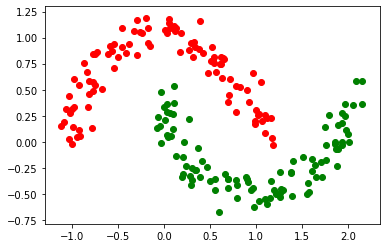

In [3]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)
plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r')
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g')

t = t.reshape(-1,1)

funcs = [
    lambda x: x[:, 0],
    lambda x: x[:, 1],
    lambda x: np.multiply(x[:, 0], x[:, 1]),
    lambda x: np.power(x[:, 0], 2),
    lambda x: np.power(x[:, 1], 2),
    lambda x: np.multiply(np.power(x[:, 0], 2), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 2), x[:, 0]),
    lambda x: np.power(x[:, 0], 3),
    lambda x: np.power(x[:, 1], 3),
    lambda x: np.multiply(np.power(x[:, 0], 3), x[:, 1]),
    lambda x: np.multiply(np.power(x[:, 1], 3), x[:, 0]),
    lambda x: np.multiply(np.power(x[:, 0], 2), np.power(x[:, 1], 2)),
    lambda x: np.power(x[:, 0], 4),
    lambda x: np.power(x[:, 1], 4),
]
Xfeatures = cf.CommonFunction(X, funcs).generate()
classifier = Classification(Xfeatures, t, NumEpochs = 100, eta = 0.05).fit()

In [4]:
X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 100)

t = t.reshape(-1,1)

Xfeatures = cf.CommonFunction(X, funcs).generate()
prediction = classifier.predict(Xfeatures,t)

MSE =  [[0.00900394]]


(46597, 2)
(43403, 2)


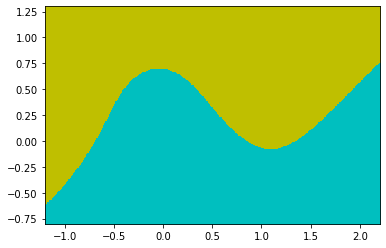

In [9]:
xlim = (-1.2, 2.2)
ylim = (-0.8, 1.3)

X, t = skdata.make_moons(n_samples = Nsample, noise = sampleNoise, shuffle = False, random_state = 0)
halfSample = int(Nsample/2)

xplot = np.linspace(xlim[0], xlim[1], 300)
yplot = np.linspace(ylim[0], ylim[1], 300)
xgrid, ygrid = np.meshgrid(xplot, yplot)
xgrid = xgrid.reshape(-1, 1)
ygrid = ygrid.reshape(-1, 1)

xygrid = np.hstack((xgrid, ygrid))
Xfeatures = cf.CommonFunction(xygrid, funcs).generate()
prediction = classifier.predict(Xfeatures)
X0, X1 = seperateLabel(xygrid, prediction)

print(X0.shape)
print(X1.shape)

plt.scatter(X0[:, 0].ravel(), X0[:, 1].ravel(), c = 'y', marker = 's', s = 5)
plt.scatter(X1[:, 0].ravel(), X1[:, 1].ravel(), c = 'c', marker = 's', s = 5)

plt.scatter(X[:halfSample, 0], X[:halfSample, 1], c = 'r', label = "class0")
plt.scatter(X[halfSample:, 0], X[halfSample:, 1], c = 'g', label = "class1")

plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.show()